<a href="https://colab.research.google.com/github/angelaguzmanar/RRHH/blob/main/ModelosRH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kora -q
from kora import drive
drive.link_nbs()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Analitica3/EntregaRH/')
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '/nbs',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Analitica3/EntregaRH/',
 '/content/drive/MyDrive/Analitica3/EntregaRH/']

In [ ]:
import pandas as pd ### para manejo de datos
import sqlite3 as sql
import funciones_rh as funciones

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
import joblib
from sklearn.compose import ColumnTransformer

In [ ]:
dfdata = pd.read_csv('https://raw.githubusercontent.com/angelaguzmanar/RRHH/main/data_final.csv')

##Preparar base para predecir

In [ ]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      4410 non-null   int64 
 1   BusinessTravel           4410 non-null   object
 2   Department               4410 non-null   object
 3   DistanceFromHome         4410 non-null   int64 
 4   Education                4410 non-null   int64 
 5   EducationField           4410 non-null   object
 6   EmployeeID               4410 non-null   int64 
 7   Gender                   4410 non-null   object
 8   JobLevel                 4410 non-null   int64 
 9   JobRole                  4410 non-null   object
 10  MaritalStatus            4410 non-null   object
 11  MonthlyIncome            4410 non-null   int64 
 12  NumCompaniesWorked       4410 non-null   int64 
 13  PercentSalaryHike        4410 non-null   int64 
 14  StockOptionLevel         4410 non-null  

In [ ]:
n_c1 = dfdata.columns.tolist()

In [ ]:
df_dummys = pd.get_dummies(dfdata.iloc[:,:-1])
df_dummys.head()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,1,131160,1,11,0,1,...,0,0,0,0,0,0,0,0,1,0
1,31,10,1,2,1,41890,0,23,1,6,...,0,0,0,0,1,0,0,0,0,1
2,32,17,4,3,4,193280,1,15,3,5,...,0,0,0,0,0,1,0,0,1,0
3,38,2,5,4,3,83210,3,11,3,13,...,0,0,0,0,0,0,0,0,1,0
4,32,10,1,5,1,23420,4,12,2,9,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
nombre_columnas= df_dummys.columns.tolist()

In [ ]:
nombre_columnas

['Age',
 'DistanceFromHome',
 'Education',
 'EmployeeID',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'JobInvolvement',
 'PerformanceRating',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Sci

In [ ]:
# Separación de variables / caracteristicas
X = df_dummys
y = dfdata.iloc[:, -1].values # target

In [ ]:
# LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0:5])


[0 1 0 0 0]


In [ ]:
# Separación en conjuntos de entrenamiento y validación con 75% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('int').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (3528, 45)
Tamaño del conjunto de validación: (882, 45)


In [ ]:
#convertimos los datos estandarizados a df para meterlos al modelo
X_train_std_df = pd.DataFrame(X_train_std)

In [ ]:
X_train_std_df.columns= nombre_columnas

In [ ]:
X_test_std_df = pd.DataFrame(X_test_std)

In [ ]:
X_test_std_df.columns= nombre_columnas

##Regresion logistica

In [ ]:
#Primero usaremos un modelo de regresión logística que nos es útil para predecir si es probable que un empleado se retire o no,
#Además es fácil de interpretar y  nos puede proporcionar información sobre qué variables son las más influyentes en la decisión de un empleado para renunciar.


In [ ]:
#vamos a relizar un modelo balanceado
from sklearn.linear_model import LogisticRegression

# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std_df, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std_df)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std_df,y_train)*100) + "%")
#print("Score: ", regr.score(X_train_std, y_pred))

Coeficientes:  [[-2.79373320e-01 -2.90154587e-02 -1.00928707e-01 -2.47564332e-02
  -1.51138491e-01 -6.71926963e-02  3.24097170e-01 -6.48426361e-02
  -1.96641353e-02 -5.19211005e-01 -2.66025909e-01  1.82812073e-01
   5.04839723e-01 -6.64979321e-01 -3.44439308e-01 -4.49515767e-01
  -2.16131696e-01  3.46300237e-02  1.27409443e-01 -7.68833748e-01
   7.25892480e-01  4.24614273e-02  6.31921442e-01 -2.77371733e-01
  -3.55029550e-01  9.04782501e-01 -8.38055972e-04 -1.64830607e-01
  -1.00296006e-02 -4.10259385e-01 -3.19304694e-01 -3.46251744e-02
   3.41453339e-02 -7.73767420e-02 -1.15481332e-01 -1.92900073e-02
  -2.77668258e-01 -6.18208532e-01  7.17465427e-01  2.35597428e-01
   2.39035212e-01 -8.45530344e-02 -4.92606840e-01 -1.88016723e-01
   6.80143723e-01]]

Intercepto:  [-0.36297065]
Accuracy (Train): 71.68367346938776%


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std_df)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std_df,y_test)*100) + "%")

Accuracy (Test): 68.02721088435374%


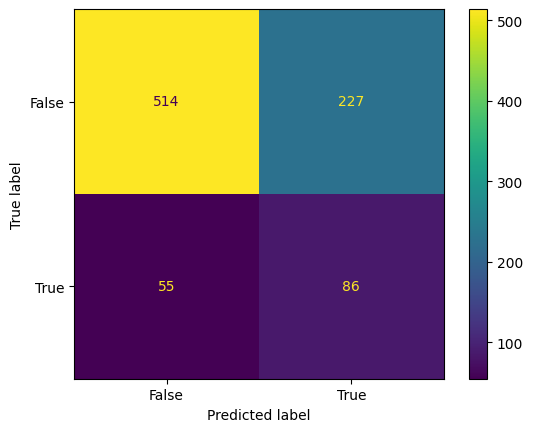

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, y_hat)
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm1_display.plot()
plt.show()


In [ ]:
metricas_modelos = []

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_tr = precision_score(y_train, y_pred)
recall_tr = recall_score(y_train, y_pred)
f1score_tr = f1_score(y_train, y_pred)
accuracy_tr = metrics.accuracy_score(y_train, y_pred)

print(f'Precision: {precision_tr:.2f}')
print(f'Recall: {recall_tr:.2f}')
print(f'F1-score: {f1score_tr:.2f}')

Precision: 0.33
Recall: 0.72
F1-score: 0.45


In [ ]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_te  = precision_score(y_test, y_hat)
recall_te = recall_score(y_test, y_hat)
f1score_te = f1_score(y_test, y_hat)
accuracy_te = metrics.accuracy_score(y_test, y_hat)

print(f'Precision: {precision_te:.2f}')
print(f'Recall: {recall_te:.2f}')
print(f'F1-score: {f1score_te:.2f}')

Precision: 0.27
Recall: 0.61
F1-score: 0.38


In [ ]:
metricas_modelos.append(('Regresión', precision_tr, recall_tr, f1score_tr, accuracy_tr, precision_te, recall_te, f1score_te, accuracy_te))

In [ ]:
#La exactitud es una métrica que mide la proporción de predicciones correctas en relación con el total de predicciones realizadas por el modelo.
#Este modelo clasifica correctamente aproximadamente el 68.03% de todas las instancias

#La precisión mide la capacidad del modelo para evitar hacer predicciones falsas positivas.
#este caso, una precisión de 0.33 significa que aproximadamente el 33% de las predicciones positivas hechas por el modelo son correctas,
#mientras que el 67% son falsas alarmas.

#El recall mide la capacidad del modelo para encontrar todas las instancias positivas.
#en nuestro caso, un recall de 0.72 significa que el modelo es capaz de identificar correctamente alrededor del 72% de todas las instancias positivas en el conjunto de datos.

#El F1-score es una métrica que combina la precisión y el recall en una sola puntuación.
#Un F1-score de 0.45 indica un equilibrio entre la precisión y el recall.
#Cuanto más alto sea el F1-score, mejor, ya que nos indica un equilibrio más óptimo entre la precisión y el recall


#En la matriz de confusión podemos analizar el rendimiento del modelo como podemos observar hay una gran cantidad de falsos positivos (841)
#Y también una gran cantidad de falsos negativos siendo estos (160)
#En este contexto, un falso positivo se refiere a la clasificación incorrecta de un empleado como alguien que se retirará de la empresa cuando, en realidad, no lo hará.
#Tener  estos falsos positivos puede llevar a la adopción de acciones innecesarias, como la implementación de estrategias de retención para empleados que no tenían la intención de retirarse.
#Esto puede generar costos adicionales y recursos mal asignados.
#Un falso negativo se produce cuando el modelo no identifica a un empleado que finalmente se retira de la empresa.
#Tener falsos negativos en este caso es más problemático. Si el modelo no puede detectar a empleados que se retirarán,
#la empresa podría perder la oportunidad de implementar estrategias de retención a tiempo, lo que resultaría en una tasa de retiro más alta de lo deseado.







##Arbol de decision

In [ ]:
#Ahora vamos a usar un árbol de decisión ya que este es versátil y se puede aplicar a nuestro caso de estudio, puede manejar diferentes tipos de caracteristicas
#Además puede proporcionar información sobre qué variables son las más influyentes en la decisión de un empleado para renunciar
#Además son interpretables y fáciles de entender


In [ ]:
treedf =tree.DecisionTreeClassifier(random_state=0)
treedf.fit(X_train_std_df, y_train)
treedfpred=treedf.predict(X_test_std_df)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_tr = precision_score(y_train, treedf.predict(X_train_std_df))
recall_tr = recall_score(y_train, treedf.predict(X_train_std_df))
f1score_tr = f1_score(y_train, treedf.predict(X_train_std_df))
accuracy_tr = metrics.accuracy_score(y_train, treedf.predict(X_train_std_df))

print(f'Precision: {precision_tr:.2f}')
print(f'Recall: {recall_tr:.2f}')
print(f'F1-score: {f1score_tr:.2f}')

Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [ ]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_te  = precision_score(y_test, treedf.predict(X_test_std_df))
recall_te = recall_score(y_test, treedf.predict(X_test_std_df))
f1score_te = f1_score(y_test, treedf.predict(X_test_std_df))
accuracy_te = metrics.accuracy_score(y_test, treedf.predict(X_test_std_df))

print(f'Precision: {precision_te:.2f}')
print(f'Recall: {recall_te:.2f}')
print(f'F1-score: {f1score_te:.2f}')

Precision: 0.94
Recall: 0.94
F1-score: 0.94


In [ ]:
metricas_modelos.append(('TreeDf', precision_tr, recall_tr, f1score_tr, accuracy_tr, precision_te, recall_te, f1score_te, accuracy_te))

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, treedf.predict(X_train_std_df)))
print ("Train - classification report:\n", metrics.classification_report(y_train, treedf.predict(X_train_std_df)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, treedf.predict(X_test_std_df)))
print ("Test - classification report :", metrics.classification_report(y_test, treedf.predict(X_test_std_df)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       570

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9795918367346939
Test - classification report :               precision    recall  f1-score   support

           0       0.99      0.99      0.99       741
           1       0.94      0.94      0.94       141

    accuracy                           0.98       882
   macro avg       0.96      0.96      0.96       882
weighted avg       0.98      0.98      0.98       882



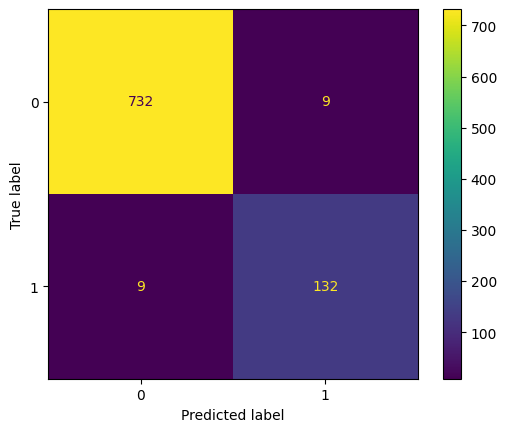

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, treedf.predict(X_test_std_df))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

In [ ]:
#La exactitud es una métrica que mide la proporción de predicciones correctas en relación con el total de predicciones realizadas por el modelo.
#Este modelo clasifica correctamente aproximadamente el 97,6% de todas las instancias

#Para la Clase positiva, el modelo muestra un alto nivel de precisión (0.98) y un alto recall (0.99), lo que significa que es muy bueno en la clasificación de esta clase. El F1-score de 0.99 también indica un muy buen rendimiento
#Para la Clase negativa, el modelo tiene una precisión menor (0.93) pero aún es bastante alta. El recall (0.91) es un poco menor, lo que significa que hay algunos falsos negativos,
#pero el F1-score de 0.92 indica un buen equilibrio entre precisión y recall.


#En la matrix de confusion podemos analizar el rendimiento del modelo como podemos observar hay muy pocos falsos positivos (9)
#Y tambien una poca cantidad de falsos negativos siendo estos (12)
#En este contexto, un falso positivo se refiere a la clasificación incorrecta de un empleado como alguien que se retirará de la empresa cuando, en realidad, no lo hará.
#Tener  estos falsos positivos puede llevar a la adopción de acciones innecesarias, como la implementación de estrategias de retención para empleados que no tenían la intención de retirarse.
#Esto puede generar costos adicionales y recursos mal asignados.
#Un falso negativo se produce cuando el modelo no identifica a un empleado que finalmente se retira de la empresa.
#Tener falsos negativos en este caso es más problemático. Si el modelo no puede detectar a empleados que se retirarán,
#la empresa podría perder la oportunidad de implementar estrategias de retención a tiempo, lo que resultaría en una tasa de retiro más alta de lo deseado.


#En general, las métricas indican que el modelo tiene un rendimiento muy sólido en la clasificación de ambas clases,
#con un énfasis en la precisión de la clase positiva

##Random Forest

In [ ]:
#Usaremos un Random forest ya que es un modelo preciso ya que al combinar múltiples árboles entrenados en subconjuntos aleatorios de datos mejora la precisión de los modelos
#Además pueden manejar conjuntos de datos en los que las clases están desequilibradas,como es nuestro caso.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Definición del modelo
ranfor = RandomForestClassifier(random_state = 123, n_estimators=100)
ranfor.fit(X_train_std_df, y_train)

RandomForestClassifier(random_state=123)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_tr = precision_score(y_train, ranfor.predict(X_train_std_df))
recall_tr = recall_score(y_train, ranfor.predict(X_train_std_df))
f1score_tr = f1_score(y_train, ranfor.predict(X_train_std_df))
accuracy_tr = metrics.accuracy_score(y_train, ranfor.predict(X_train_std_df))

print(f'Precision: {precision_tr:.2f}')
print(f'Recall: {recall_tr:.2f}')
print(f'F1-score: {f1score_tr:.2f}')

Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [ ]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_te  = precision_score(y_test, ranfor.predict(X_test_std_df))
recall_te = recall_score(y_test, ranfor.predict(X_test_std_df))
f1score_te = f1_score(y_test, ranfor.predict(X_test_std_df))
accuracy_te = metrics.accuracy_score(y_test, ranfor.predict(X_test_std_df))

print(f'Precision: {precision_te:.2f}')
print(f'Recall: {recall_te:.2f}')
print(f'F1-score: {f1score_te:.2f}')

Precision: 1.00
Recall: 0.91
F1-score: 0.95


In [ ]:
metricas_modelos.append(('RandomForest', precision_tr, recall_tr, f1score_tr, accuracy_tr, precision_te, recall_te, f1score_te, accuracy_te))

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train_std_df)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train_std_df)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test_std_df)))
print ("Test - classification report :\n", metrics.classification_report(y_test, ranfor.predict(X_test_std_df)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       570

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9852607709750567
Test - classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       741
           1       1.00      0.91      0.95       141

    accuracy                           0.99       882
   macro avg       0.99      0.95      0.97       882
weighted avg       0.99      0.99      0.98       882



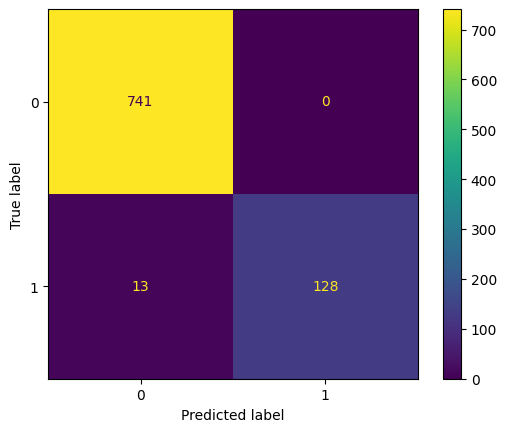

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, ranfor.predict(X_test_std_df))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

In [ ]:
#La exactitud es una métrica que mide la proporción de predicciones correctas en relación con el total de predicciones realizadas por el modelo.
#Este modelo clasifica correctamente aproximadamente el 98,52% de todas las instancias.


#Para la clase positiva el modelo muestra un alto nivel de precisión (0.98) y un recall perfecto (1.00), lo que significa que es excelente en la clasificación de esta clase.
#El F1-score de 0.99 indica un rendimiento casi perfecto.

#Para la clase negativa el modelo tiene una precisión perfecta (1.00) y un recall muy alto (0.91), lo que indica que es muy bueno en la clasificación de esta clase.
#El F1-score de 0.95 también indica un rendimiento muy alto.

#En la matrix de confusion podemos analizar el rendimiento del modelo como podemos observar que no hay  pocos falsos positivos, y una poca cantidad de falsos negativos siendo estos (13)
#En este contexto, al no tener falsos positivos no habria riesgo de predecir incorrectamente que un empleados se ira cuando realmente no lo hara.
#Pero tener falsos positivos puede llevar a la adopción de acciones innecesarias, como la implementación de estrategias de retención para empleados que no tenían la intención de retirarse.
#Esto puede generar costos adicionales y recursos mal asignados.
#Un falso negativo se produce cuando el modelo no identifica a un empleado que finalmente se retira de la empresa.
#Tener falsos negativos en este caso es más problemático. Si el modelo no puede detectar a empleados que se retirarán,
#la empresa podría perder la oportunidad de implementar estrategias de retención a tiempo, lo que resultaría en una tasa de retiro más alta de lo deseado.


#En general, las métricas indican que el modelo tiene un muy buen rendimiento en la clasificación de ambas clases, con altos valores de precisión, recall y F1-score.
#La precisión es especialmente buena, ya que indica que el modelo realiza muy pocas predicciones incorrectas en ambas clases.
#En el caso de este modelo podriamos pensar en sobreajuste por lo que habria que hacerle manejo a ese sobreajuste.


##Modelo seleccionado ARBOL DE DECISION

## Seleccion de variables

In [ ]:
treedf =tree.DecisionTreeClassifier(random_state=0)
treedf.fit(X_train_std_df, y_train)
treedfpred=treedf.predict(X_test_std_df)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
standard_scaler = StandardScaler()
X_std = standard_scaler.fit_transform(X)

# Selector de variables con Lasso
sel_ = SelectFromModel(Lasso(alpha=0.05), max_features=35)
sel_.fit(X_std, y)
print(sel_.estimator_.coef_)
#Obtener variables seleccionadas
X_new = sel_.get_support()

df_new = X.iloc[:,X_new]
df_new.head()

[-0.         -0.         -0.         -0.         -0.         -0.
  0.          0.         -0.         -0.01045313 -0.         -0.
 -0.         -0.00200445 -0.         -0.         -0.         -0.
  0.         -0.          0.         -0.          0.         -0.
 -0.          0.          0.         -0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.         -0.          0.          0.          0.         -0.
 -0.         -0.          0.01347924]


,TotalWorkingYears,YearsWithCurrManager,MaritalStatus_Single
0,1,0,0
1,6,4,1
2,5,3,0
3,13,5,0
4,9,4,1


In [ ]:
# Crear una lista para almacenar los resultados
resultados = []

# Iterar el número de 25 en 5 en 5
for k in range(10, 46, 5):
    X_new = funciones.select_kbest(X, y, f_classif, k)
    df_new = X.iloc[:, X_new]
    columnas_T = df_new.columns.tolist()
        #vamos a relizar un modelo

    treedf= tree.DecisionTreeClassifier(random_state=0)
    treedf.fit(X_train_std_df.loc[:,columnas_T], y_train)
    treedfpred=treedf.predict(X_test_std_df.loc[:,columnas_T])
    #Exactitud de modelo
    #Predicciones sobre el conjunto de test
    y_hat = treedf.predict(X_test_std_df.loc[:,columnas_T])
    # Crear un diccionario con los resultados y el número de iteración
    resultado_actual = {
        'Número de iteración': k,
        'Train accuracy': str(treedf.score(X_train_std_df.loc[:,columnas_T],y_train)*100),
        'Test accuracy': str(treedf.score(X_test_std_df.loc[:,columnas_T],y_test)*100) + "%",
    }

    resultados.append(resultado_actual)

# Crear un DataFrame a partir de la lista de resultados
df_resultados = pd.DataFrame(resultados)

# Mostrar el DataFrame de resultados
df_resultados

,Número de iteración,Train accuracy,Test accuracy
0,10,99.97165532879818,98.86621315192744%
1,15,100.0,99.09297052154194%
2,20,100.0,99.43310657596372%
3,25,100.0,98.63945578231292%
4,30,100.0,98.75283446712018%
5,35,100.0,98.4126984126984%
6,40,100.0,98.4126984126984%
7,45,100.0,97.95918367346938%


In [ ]:
# Obtener columnas seleciconadas -
X_new = funciones.select_kbest(X, y,  f_classif,20) #Se escogio el de 20, porque con al hacer la seleccion de variables, la cantidad de variables que maximiza el test accuracy es 20.
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()

,Age,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,EducationField_Human Resources,EducationField_Technical Degree,JobRole_Manufacturing Director,JobRole_Research Director,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,1,1,6,1,0,3,4,2,0,0,1,0,0,0,0,0,0,1,0
1,31,0,6,3,5,4,3,2,4,0,1,0,0,0,0,0,0,0,0,1
2,32,1,5,2,5,3,2,2,1,0,1,0,0,0,0,0,0,0,1,0
3,38,3,13,5,8,5,4,4,3,1,0,0,0,0,0,0,0,0,1,0
4,32,4,9,2,6,4,4,1,3,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
columnas_T = df_new.columns.tolist()

In [ ]:
  #como podemos observar los metodos de seleccion de variables nos dan variables muy similares por lo que se usaran las variables que incluyen los dos metodos

###Arbol de decision

In [ ]:
treedf =tree.DecisionTreeClassifier(random_state=0)
treedf.fit(X_train_std_df.loc[:,columnas_T], y_train)
treedfpred=treedf.predict(X_test_std_df.loc[:,columnas_T])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_tr = precision_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T]))
recall_tr = recall_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T]))
f1score_tr = f1_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T]))
accuracy_tr = metrics.accuracy_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T]))

print(f'Precision: {precision_tr:.2f}')
print(f'Recall: {recall_tr:.2f}')
print(f'F1-score: {f1score_tr:.2f}')

Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [ ]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_te  = precision_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))
recall_te = recall_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))
f1score_te = f1_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))
accuracy_te = metrics.accuracy_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))

print(f'Precision: {precision_te:.2f}')
print(f'Recall: {recall_te:.2f}')
print(f'F1-score: {f1score_te:.2f}')

Precision: 1.00
Recall: 0.96
F1-score: 0.98


In [ ]:
metricas_modelos.append(('Treedf_20', precision_tr, recall_tr, f1score_tr, accuracy_tr, precision_te, recall_te, f1score_te, accuracy_te))

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T])))
print ("Train - classification report:\n", metrics.classification_report(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T])))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T])))
print ("Test - classification report :", metrics.classification_report(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T])))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       570

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9943310657596371
Test - classification report :               precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



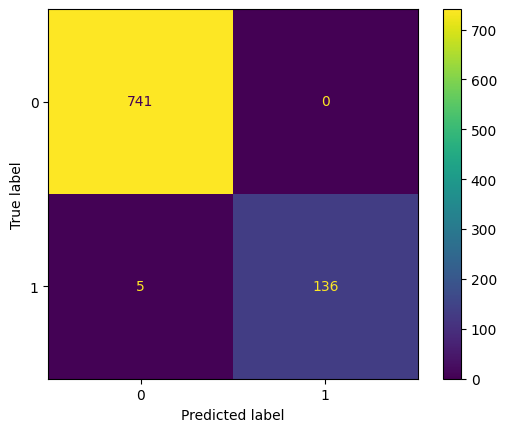

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

In [ ]:
# Obtener importancia de las características
importancias = treedf.feature_importances_

# Crear un DataFrame con las importancias y los nombres de las características
importancias_df = pd.DataFrame({'Variable': X_train_std_df.loc[:,columnas_T].columns, 'Importancia': importancias})
importancias_df = importancias_df.reindex(importancias_df['Importancia'].sort_values(ascending=False).index)

# Mostrar las variables más importantes
print(importancias_df)

                            Variable  Importancia
0                                Age     0.173279
2                  TotalWorkingYears     0.157192
7                    JobSatisfaction     0.088257
5               YearsWithCurrManager     0.081392
3              TrainingTimesLastYear     0.079190
1                 NumCompaniesWorked     0.078766
4                     YearsAtCompany     0.061865
6            EnvironmentSatisfaction     0.059994
8                    WorkLifeBalance     0.053330
19              MaritalStatus_Single     0.032111
16         JobRole_Research Director     0.027344
10  BusinessTravel_Travel_Frequently     0.022105
12        Department_Human Resources     0.020253
17            MaritalStatus_Divorced     0.017320
11      BusinessTravel_Travel_Rarely     0.011895
13    EducationField_Human Resources     0.011497
9          BusinessTravel_Non-Travel     0.010598
18             MaritalStatus_Married     0.010179
14   EducationField_Technical Degree     0.001759


###Random Forest

In [ ]:
ranfor =RandomForestClassifier(random_state = 42)
ranfor.fit(X_train_std_df.loc[:,columnas_T], y_train)
ranforpred =ranfor.predict(X_test_std_df.loc[:,columnas_T])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_tr = precision_score(y_train, ranfor.predict(X_train_std_df.loc[:,columnas_T]))
recall_tr = recall_score(y_train, ranfor.predict(X_train_std_df.loc[:,columnas_T]))
f1score_tr = f1_score(y_train, ranfor.predict(X_train_std_df.loc[:,columnas_T]))
accuracy_tr = metrics.accuracy_score(y_train, ranfor.predict(X_train_std_df.loc[:,columnas_T]))

print(f'Precision: {precision_tr:.2f}')
print(f'Recall: {recall_tr:.2f}')
print(f'F1-score: {f1score_tr:.2f}')

Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [ ]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_te  = precision_score(y_test, ranfor.predict(X_test_std_df.loc[:,columnas_T]))
recall_te = recall_score(y_test, ranfor.predict(X_test_std_df.loc[:,columnas_T]))
f1score_te = f1_score(y_test, ranfor.predict(X_test_std_df.loc[:,columnas_T]))
accuracy_te = metrics.accuracy_score(y_test, ranfor.predict(X_test_std_df.loc[:,columnas_T]))

print(f'Precision: {precision_te:.2f}')
print(f'Recall: {recall_te:.2f}')
print(f'F1-score: {f1score_te:.2f}')

Precision: 1.00
Recall: 0.96
F1-score: 0.98


In [ ]:
metricas_modelos.append(('RandomForest_20', precision_tr, recall_tr, f1score_tr, accuracy_tr, precision_te, recall_te, f1score_te, accuracy_te))

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T])))
print ("Train - classification report:\n", metrics.classification_report(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T])))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T])))
print ("Test - classification report :", metrics.classification_report(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T])))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00       570

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9943310657596371
Test - classification report :               precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.96      0.98       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



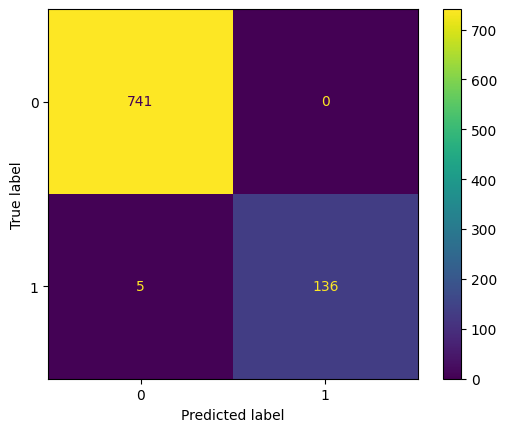

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

## Grilla y Kfold

In [ ]:
resultados = []

In [ ]:
#K_fold para arbol de decision con todas las variables
precision_entrenamiento, precision_prueba = funciones.evaluate_model(X_train_std_df, y_train, X_test_std_df, y_test, treedf, 10, 'accuracy')
resultados.append(('Treedf', precision_entrenamiento, precision_prueba))
precision_entrenamiento, precision_prueba = funciones.evaluate_model(X_train_std_df.loc[:,columnas_T], y_train, X_test_std_df.loc[:,columnas_T], y_test, treedf, 10, 'accuracy')
resultados.append(('Treedf_VS', precision_entrenamiento, precision_prueba))


In [ ]:
# Crear un DataFrame a partir de la lista de resultados
df_resultados = pd.DataFrame(resultados, columns=['Caso', 'Accuracy Entrenamiento', 'Accuracy Prueba'])

# Imprimir el DataFrame
df_resultados

,Caso,Accuracy Entrenamiento,Accuracy Prueba
0,Treedf,97.051732,82.540858
1,Treedf_VS,97.902234,83.789581


In [ ]:
parametros = []

In [ ]:
param_grid = {
    "max_depth": [10,20,25,30,None],
    "min_samples_split": [3,5,10,15],
    "min_samples_leaf": [2, 3,5,10,15]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(treedf, param_grid, scoring='recall', n_jobs=-1, cv=10).fit(X_train_std_df.loc[:,columnas_T], y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.7649122807017543


In [ ]:
treedf =tree.DecisionTreeClassifier(criterion = 'gini',
          max_depth= 20, min_samples_leaf= 2, min_samples_split= 3,
          random_state=0)
treedf.fit(X_train_std_df.loc[:,columnas_T], y_train)
treedfpred=treedf.predict(X_test_std_df.loc[:,columnas_T])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_tr = precision_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T]))
recall_tr = recall_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T]))
f1score_tr = f1_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T]))
accuracy_tr = metrics.accuracy_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T]))

print(f'Precision: {precision_tr:.2f}')
print(f'Recall: {recall_tr:.2f}')
print(f'F1-score: {f1score_tr:.2f}')

Precision: 0.99
Recall: 0.98
F1-score: 0.99


In [ ]:
# Extraccion de elementos de la matriz
tn, fp, fn, tp = cm1.ravel()
precision_te  = precision_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))
recall_te = recall_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))
f1score_te = f1_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))
accuracy_te = metrics.accuracy_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))

print(f'Precision: {precision_te:.2f}')
print(f'Recall: {recall_te:.2f}')
print(f'F1-score: {f1score_te:.2f}')

Precision: 0.89
Recall: 0.84
F1-score: 0.87


In [ ]:
parametros.append(('TreeDF_Afinar', precision_tr, recall_tr, f1score_tr, accuracy_tr, precision_te, recall_te, f1score_te, accuracy_te))

In [ ]:
# Métricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T])))
print ("Train - classification report:\n", metrics.classification_report(y_train, treedf.predict(X_train_std_df.loc[:,columnas_T])))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T])))
print ("Test - classification report :", metrics.classification_report(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T])))

Train - Accuracy : 0.9951814058956916
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       0.99      0.98      0.99       570

    accuracy                           1.00      3528
   macro avg       0.99      0.99      0.99      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9580498866213152
Test - classification report :               precision    recall  f1-score   support

           0       0.97      0.98      0.98       741
           1       0.89      0.84      0.87       141

    accuracy                           0.96       882
   macro avg       0.93      0.91      0.92       882
weighted avg       0.96      0.96      0.96       882



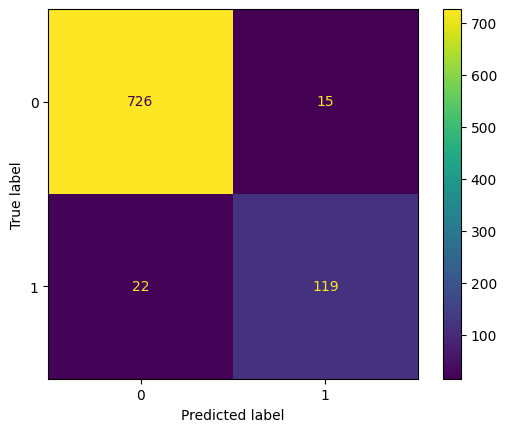

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm1= confusion_matrix(y_test, treedf.predict(X_test_std_df.loc[:,columnas_T]))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

In [ ]:
# Obtener importancia de las características
importancias = treedf.feature_importances_

# Crear un DataFrame con las importancias y los nombres de las características
importancias_df = pd.DataFrame({'Variable': X_train_std_df.loc[:,columnas_T].columns, 'Importancia': importancias})
importancias_df = importancias_df.reindex(importancias_df['Importancia'].sort_values(ascending=False).index)

# Mostrar las variables más importantes
print(importancias_df)

                            Variable  Importancia
0                                Age     0.176189
2                  TotalWorkingYears     0.140813
5               YearsWithCurrManager     0.085739
7                    JobSatisfaction     0.083572
3              TrainingTimesLastYear     0.080160
4                     YearsAtCompany     0.074207
8                    WorkLifeBalance     0.072501
1                 NumCompaniesWorked     0.069419
6            EnvironmentSatisfaction     0.052678
19              MaritalStatus_Single     0.032909
16         JobRole_Research Director     0.028758
12        Department_Human Resources     0.020113
10  BusinessTravel_Travel_Frequently     0.019021
17            MaritalStatus_Divorced     0.018041
13    EducationField_Human Resources     0.012474
11      BusinessTravel_Travel_Rarely     0.011809
18             MaritalStatus_Married     0.010295
9          BusinessTravel_Non-Travel     0.010218
14   EducationField_Technical Degree     0.001084


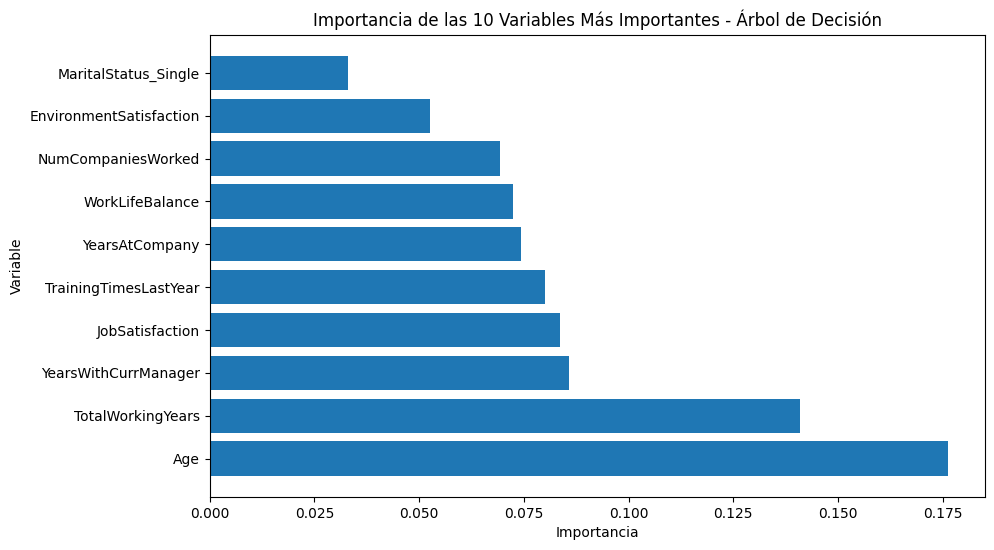

In [ ]:
# Crear un gráfico de barras con las 10 primeras variables
plt.figure(figsize=(10, 6))
plt.barh(importancias_df['Variable'][:10], importancias_df['Importancia'][:10])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las 10 Variables Más Importantes - Árbol de Decisión')
plt.show()

In [ ]:
# Realiza una validación cruzada y guarda los resultados del accuracy

resultados_accuracy = cross_val_score(treedf, X_test_std_df.loc[:,columnas_T], y_test, cv=10, scoring='accuracy')

# Imprime los resultados del accuracy para cada fold
print("Resultados del Accuracy:", resultados_accuracy)

# Calcula la precisión media y su desviación estándar
precision_media = np.mean(resultados_accuracy)
desviacion_estandar = np.std(resultados_accuracy)


Resultados del Accuracy: [0.84269663 0.85393258 0.82954545 0.81818182 0.85227273 0.80681818
 0.82954545 0.84090909 0.78409091 0.81818182]


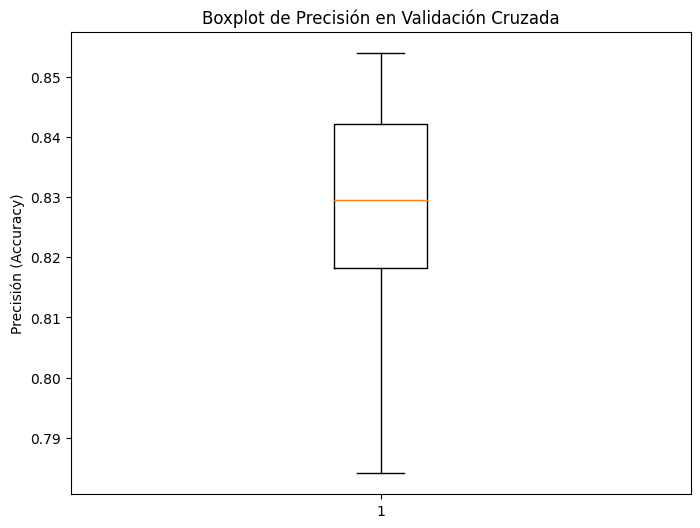

In [ ]:
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.boxplot(resultados_accuracy)
plt.title('Boxplot de Precisión en Validación Cruzada')
plt.ylabel('Precisión (Accuracy)')
plt.show()

In [ ]:
# Crear un DataFrame a partir de la lista de resultados
df_afinarparametros = pd.DataFrame(parametros, columns=['Modelo', 'Precisión Entrenamiento','Recall Entrenamiento','F1 Entrenamiento','Accuracy Entrenamiento',
                                                     'Precision Prueba','Recall Prueba','F1 Prueba','Accuracy Prueba'])

# Imprimir el DataFrame
df_afinarparametros

,Modelo,Precisión Entrenamiento,Recall Entrenamiento,F1 Entrenamiento,Accuracy Entrenamiento,Precision Prueba,Recall Prueba,F1 Prueba,Accuracy Prueba
0,TreeDF_Afinar,0.987654,0.982456,0.985048,0.995181,0.88806,0.843972,0.865455,0.95805


##Conclusiones y recomendaciones


In [ ]:
renuncia_si = dfdata[dfdata['Attrition'] == 'Yes']

In [ ]:
renuncia_no = dfdata[dfdata['Attrition'] == 'No']

In [ ]:
renuncia_si.WorkLifeBalance

1       4
6       1
13      2
28      1
30      3
       ..
4381    2
4386    1
4388    4
4391    1
4402    3
Name: WorkLifeBalance, Length: 711, dtype: int64

In [ ]:
fig= px.bar(renuncia_si, x='WorkLifeBalance', y='EmployeeID', title= '<b>Edad de los que renunciaron <b>')
fig.update_layout(
    xaxis_title='Años trabajado',
    yaxis_title='Numero de trabajadores',
    legend_title='Años trabajado',
    template= 'simple_white', #color del fondo
    title_x=0.5, #ubicacion del titulo

)

In [ ]:
fig= px.bar(renuncia_no, x='JobSatisfaction', y='EmployeeID', title= '<b>Edad de los que renunciaron <b>')
fig.update_layout(
    xaxis_title='Años trabajado',
    yaxis_title='Numero de trabajadores',
    legend_title='Años trabajado',
    template= 'simple_white', #color del fondo
    title_x=0.5, #ubicacion del titulo

)

In [ ]:
fig= px.bar(renuncia_si, x='JobSatisfaction', y='EmployeeID', title= '<b>Edad de los que renunciaron <b>')
fig.update_layout(
    xaxis_title='Años trabajado',
    yaxis_title='Numero de trabajadores',
    legend_title='Años trabajado',
    template= 'simple_white', #color del fondo
    title_x=0.5, #ubicacion del titulo

)

In [ ]:
fig= px.bar(renuncia_si, x='Age', y='EmployeeID', title= '<b>Edad de los que renunciaron <b>')
fig.update_layout(
    xaxis_title='Años trabajado',
    yaxis_title='Numero de trabajadores',
    legend_title='Años trabajado',
    template= 'simple_white', #color del fondo
    title_x=0.5, #ubicacion del titulo

)

In [ ]:
fig= px.bar(renuncia_si, x='TotalWorkingYears', y='EmployeeID', title= '<b>Años trabajando de los que renunciaron <b>')
fig.update_layout(
    xaxis_title='Años trabajado',
    yaxis_title='Numero de trabajadores',
    legend_title='Años trabajado',
    template= 'simple_white', #color del fondo
    title_x=0.5, #ubicacion del titulo

)

In [ ]:
dfdata.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Attrition'],
      dtype='object')

In [ ]:
dfdata['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

Como podemos observar la variable edad es la que más influye en el modelo esto puede relacionarse con el poco crecimiento profesional que tiene la empresa, y decidan buscar mejores oportunidades.
Otra variable influyente es el números de años trabajados en la empresa, vemos que en su mayoría solo llevan solo un año en la empresa por lo que podríamos deducir que es por que no se logran adaptar a la compañía, está puede no cumplir sus expectativas y por ello deciden irse.
La satisfacción en el trabajo se podría ver también influenciada por la satisfacción en el ambiente laboral y el balance de la vida personal con el trabajo ya que estas son las que nos dice que tan cómodo o no se encuentra el empleado en la empresa.
Por lo tanto, para abordar el problema de la alta tasa de deserción de los  empleados se pueden implementar estrategias basadas en algunas de las variables que más influyen como:

Desarrollo Profesional y Oportunidades de Crecimiento
   - Implementar programas de desarrollo profesional que permitan a los empleados adquirir nuevas habilidades y avanzar en sus carreras dentro de la empresa.
   - Establece planes de carrera claros que muestren a los empleados cómo pueden progresar y crecer dentro de la organización.
   - Proporciona oportunidades de capacitación continua a lo largo del año en lugar de limitarla a una o dos capacitación anuales. Esto permite a los empleados desarrollarse constantemente.

Adaptación y Orientación de Nuevos Empleados
   - Mejorar el proceso de adaptación y orientación para los nuevos empleados con el fin de brindarles un entorno de trabajo acogedor y recursos que les ayuden a integrarse rápidamente en la empresa.
 -Implementar programas de mentores que emparejen a empleados nuevos con colegas más experimentados que puedan guiarlos y apoyarlos en su ingreso a la empresa.

Satisfacción laboral y/o beneficios
-Promover un ambiente laboral positivo que fomente la colaboración, el respeto y la inclusión.
-Celebrar logros y reconocer el trabajo bien hecho,ofreciendo recompensas o  reconocimiento a los empleados destacados para motivarlos y mostrar aprecio por su contribución a la empresa.
- Fomenta un equilibrio saludable entre el trabajo y la vida personal, y apoyar políticas de flexibilidad laboral cuando sea posible.
-Evalúa y mejora los programas de beneficios para asegurarte de que satisfagan las necesidades de los empleados en términos de salud, bienestar y seguridad financiera.




Es muy importante tener en cuenta que se debe evaluar los resultados obtenidos de las estrategias y ajustarlas según los resultados obtenidos y las retroalimentaciones que puedan dar los empleados.



# Despliegue del modelo

In [ ]:
# Se exporta el modelo a un archivo binario en joblib
joblib.dump(treedf,'DTRRHH')


['DTRRHH']

In [ ]:
Tree =joblib.load('DTRRHH')

In [ ]:
# Se carga el archivo y se generan las predicciones
predicciones = Tree.predict(X_test_std_df.loc[:,columnas_T])

In [ ]:
pd_pred=pd.DataFrame(predicciones, columns=['pred_perf_2024'])

In [ ]:
perf_pred=pd.concat([dfdata['EmpID2'],dfdata,pd_pred],axis=1)